In [1]:
import numpy as np #matrix manipulation (matricies = multidimentional arrays)
import matplotlib.pyplot as plt #graph visualization
import sklearn #ML
import pandas as pd #data analysis - I prefer numpy, but it can be useful 

# Data Preprocessing
Get data from excel, assign arrays, etc


In [15]:
#gather from excel
data_pandas = pd.read_csv('Plane_Crashes.csv')

labels = np.array(["Date", "Time", "Location", "Flight Number", 
                   "Route", "Registration", "Aboard", 
                   "Fatalities", "Ground", "Summary"])
data_pandas



,Date,Time,Location,Operator,Flight #,Route,Type,Registration,Aboard,Fatalities,Ground,Summary,N/A
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",NaN
1,7/12/1912,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,NaN
2,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,NaN
3,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,NaN
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,5/20/2009,6:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,112.0,98.0,2.0,"While on approach, the military transport cras...",NaN
5264,5/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,NaN
5265,6/1/2009,0:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,NaN
5266,6/7/2009,8:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,1.0,1.0,0.0,The air ambulance crashed into hills while att...,NaN


In [384]:
#convert to numpy for easier manipulation
data = data_pandas.to_numpy()[:,:-1] #remove random last column
data = np.nan_to_num(data)

In [385]:
#Assign data to rows

full_dates = data[:, 0]
months = np.zeros(data.shape[0], dtype = 'int')
days = np.zeros(data.shape[0], dtype = 'int')
years = np.zeros(data.shape[0], dtype = 'int')
for m in range(data.shape[0]):
    ind = full_dates[m].split('/')
    months[m] = ind[0]
    days[m] = ind[1]
    years[m] = ind[2]
times = data[:, 1]
locations = data[:, 2]
operator = data[:,3]
route = data[:,5]
plane_type = data[:,6]
aboard = data[:,8]
fatalities = data[:,9]
grounds = data[:, 10]
summaries = data[:,11]
 

# Exploratory Data Analysis

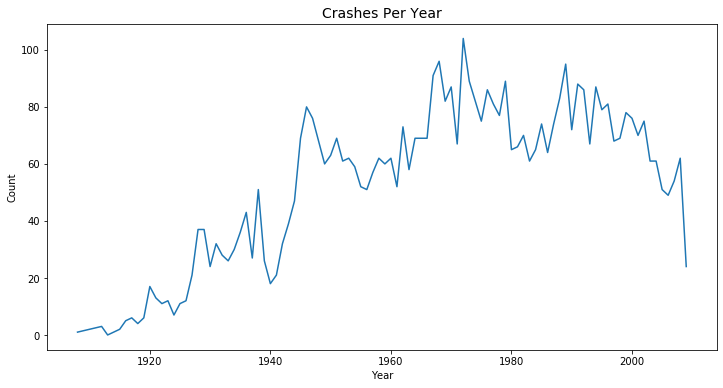

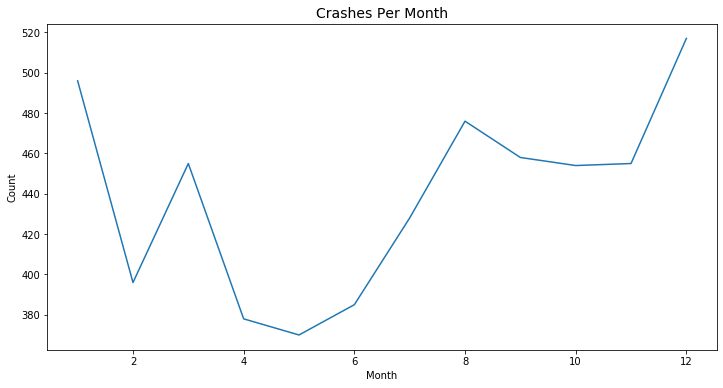

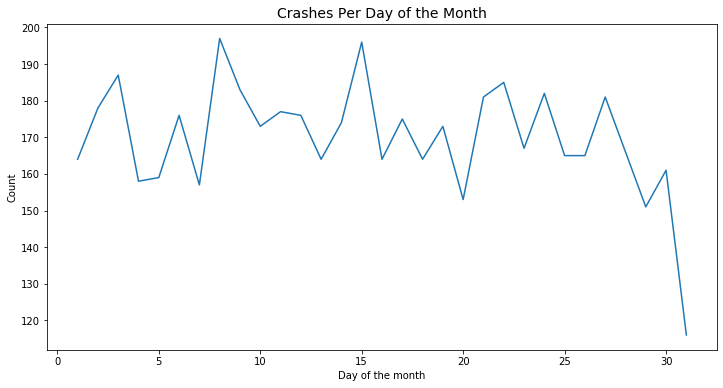

In [388]:
#Crashes per year, month, and date

plt.figure(figsize=(12,6))
plt.plot(np.unique(years), np.bincount(years)[1912:])
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Crashes Per Year', loc='Center', fontsize=14)
plt.show()

#Crashes per year, month, and date
plt.figure(figsize=(12,6))
plt.plot(np.unique(months), np.bincount(months)[1:])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Crashes Per Month', loc='Center', fontsize=14)
plt.show()

#Crashes per year, month, and date
plt.figure(figsize=(12,6))
plt.plot(np.unique(days), np.bincount(days)[1:])
plt.xlabel('Day of the month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Crashes Per Day of the Month', loc='Center', fontsize=14)
plt.show()

#is dip in month due to less traveling??

In [389]:
#Number of crashes per year for each month
months_years = np.vstack((months, years, aboard, fatalities)).T
#months_years = np.sort(months_years,axis = 0)
month_ind = ["January","February","March","April","May","June","July","August","September","October","November","December"]
months_years = months_years[months_years[:,0].argsort()][:,:2]
print(months_years.shape)
for i in range(1,13):
    num = np.where(months_years == i)
    years_ind = months_years[num[0]][:,1]

    plt.figure(figsize=(12,6))
    plt.plot(np.unique(years_ind), np.bincount(years_ind)[-(len(np.unique(years_ind))):])
    plt.xlabel("Year", fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.title("Crashes per year in " + month_ind[i], loc='Center', fontsize=14)
    plt.show()


(5268, 2)


TypeError: Cannot cast array data from dtype('O') to dtype('int64') according to the rule 'safe'

<Figure size 864x432 with 0 Axes>

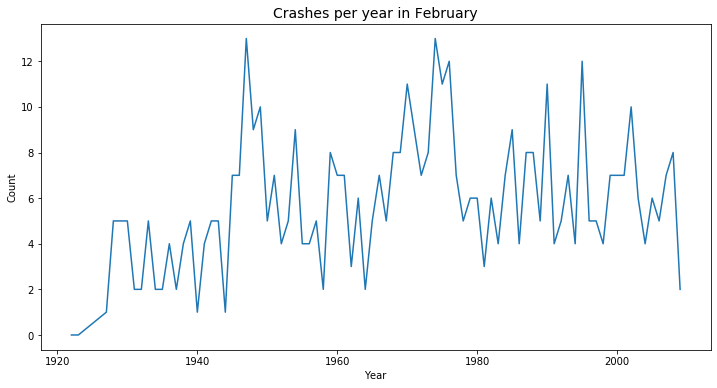

[5.0 16.0 2.0 88.0 9.0 169.0 4.0 9.0 5.0 10.0 7.0 1.0 11.0 27.0 20.0 6.0
 10.0 108.0 6.0 9.0 2.0 3.0 13.0 2.0 18.0 7.0 10.0 10.0 5.0 12.0 7.0 23.0
 36.0 23.0 16.0 14.0 10.0 23.0 14.0 24.0 31.0 24.0 47.0 2.0 5.0 11.0 19.0
 28.0 4.0 5.0 4.0 9.0 4.0 4.0 2.0 2.0 3.0 22.0 10.0 1.0 7.0 10.0 16.0
 104.0 3.0 1.0 20.0 39.0 27.0 12.0 96.0 4.0 66.0 24.0 10.0 3.0 15.0 16.0
 1.0 21.0 35.0 16.0 4.0 92.0 1.0 11.0 21.0 21.0 12.0 3.0 9.0 3.0 61.0 14.0
 23.0 46.0 21.0 75.0 16.0 29.0 3.0 38.0 38.0 3.0 70.0 9.0 14.0 2.0 21.0
 17.0 5.0 3.0 87.0 1.0 6.0 1.0 40.0 27.0 3.0 2.0 42.0 17.0 22.0 50.0 1.0
 54.0 10.0 1.0 16.0 13.0 3.0 17.0 19.0 21.0 5.0 6.0 26.0 1.0 5.0 3.0 7.0
 18.0 5.0 15.0 13.0 12.0 4.0 19.0 26.0 3.0 2.0 4.0 7.0 38.0 3.0 11.0 2.0
 37.0 3.0 3.0 176.0 44.0 4.0 4.0 4.0 17.0 2.0 8.0 2.0 18.0 19.0 2.0 2.0
 5.0 87.0 7.0 47.0 5.0 39.0 14.0 1.0 2.0 25.0 22.0 4.0 12.0 21.0 16.0 4.0
 23.0 3.0 1.0 5.0 1.0 51.0 14.0 12.0 7.0 17.0 2.0 3.0 10.0 3.0 9.0 23.0
 2.0 4.0 2.0 10.0 24.0 4.0 3.0 11.0 10.0 3.0 16.0 17

ValueError: cannot convert float NaN to integer

<Figure size 864x432 with 0 Axes>

In [404]:
#Number of crashes per year for each month
all_items = np.vstack((months, years, fatalities, aboard)).T
all_items_sorted = all_items[all_items[:,0].argsort()]

#months_years = np.sort(months_years,axis = 0)
month_ind = ["January","February","March","April","May","June","July","August","September","October","November","December"]

#for i in range(1,13):
i =1

#crashes
months_years = all_items_sorted[:,:2]
num = np.where(months_years == i)
years_ind = np.array(months_years[num[0]][:,1])
#plot crashes
plt.figure(figsize=(12,6))
plt.plot(np.unique(years_ind), np.bincount(np.array(years_ind, dtype = 'int64'))[-(len(np.unique(years_ind))):])
plt.xlabel("Year", fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title("Crashes per year in " + month_ind[i], loc='Center', fontsize=14)
plt.show()

#fatalities
m_y_f = all_items_sorted[:,:3]
total_fatalities = np.array(m_y_f[num[0]][:,2])
print(total_fatalities)
plt.figure(figsize=(12,6))
plt.plot(np.unique(years_ind), np.bincount(np.array(total_fatalities, dtype = 'int64'))[-(len(np.unique(years_ind))):])
plt.xlabel("Year", fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title("Fatalities per year in " + month_ind[i], loc='Center', fontsize=14)
plt.show()

In [499]:
#Number of crashes per year for each month
all_items = np.vstack((months, years, fatalities, aboard)).T
all_items_sorted = all_items[all_items[:,0].argsort()]
#months_years = np.sort(months_years,axis = 0)
month_vals = ["January","February","March","April","May","June","July","August","September","October","November","December"]

l = []
temp = 0
for i in range(1,13):
    month_ind = np.where(all_items_sorted[:,0] == i)[0].shape[0]

    arr = all_items_sorted[temp:month_ind]
    temp = month_ind
    l.append(arr)
   
#for i in range(1,13):
i = 1
curr = l[0] #l[i-1]
x_val = np.unique(curr[:,1]) #all the years

y_val_num_crashes = np.bincount(np.array(curr[:,1].T, dtype = 'int64'))[-len(x_val):]


a = np.nan_to_num(curr[:,2])
print(type(a[282]))
for i in a:
    if i  == np.nan:
        print("WOW)")
#print(a)

#y_val_num_fatalities = np.nan_to_num(curr:)

SyntaxError: invalid syntax (<ipython-input-499-e78a300803e2>, line 27)

In [451]:
months_years = np.array([[1,2,3,4,3],
                         [12,3,4,3,4]])
num = np.where(months_years == 3, axis =)
num

(array([1, 3], dtype=int64),)